In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts


In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.head(10)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [3]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [5]:

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
city_data_types=city_data_df[(city_data_df['type'] == 'Suburban') | (city_data_df['type'] == 'Rural') ]
city_data_types.groupby(['type']).count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36


In [7]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [8]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df,city_data_df, on=["city","city"],how="left")

#pd.merge(df1,df2,on=['filename'],how="outer",indicator=True)
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12,33,Urban


In [9]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [10]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"])["ride_id"].count()
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [11]:
# Get the number of rides for urban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"])["ride_id"].count()


rural_ride_count = rural_cities_df.groupby (["city"])["ride_id"].count()
rural_ride_count.count()

18

In [12]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"])["fare"].mean()
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.count()

18

In [13]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

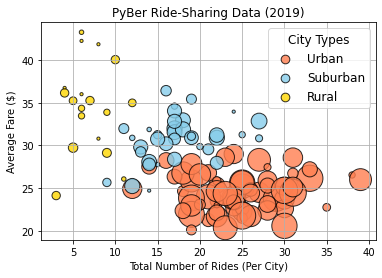

In [14]:
# Build the scatter plots for urban cities.
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)


# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)


# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
#plt.legend()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
#lgnd.legendHandles[0]

plt.show()


In [15]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [16]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [17]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [18]:
# Get summary statistics.
#urban_ride_count.describe()
#round(urban_ride_count.mean(),2)
round(urban_ride_count.mean(),2)
urban_ride_count.median()
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [19]:
suburban_ride_count.describe()

suburban_ride_count.mode()

0    17
dtype: int64

In [20]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [21]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [22]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")


mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [23]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head(10)

#urban_cities_df
urban_fares.mean()

24.52577230769236

In [24]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [25]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head(10)

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [26]:
rural_fares = rural_cities_df["fare"]
rural_fares.head(10)

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [27]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
#urban_drivers.head()

In [28]:
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
mean_urban_drivers,median_urban_drivers,mode_urban_drivers

(36.67815384615385,
 37.0,
 ModeResult(mode=array([39], dtype=int64), count=array([86])))

In [29]:
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
round(mean_suburban_drivers,0),median_suburban_drivers,mode_suburban_drivers

(14.0, 16.0, ModeResult(mode=array([20], dtype=int64), count=array([79])))

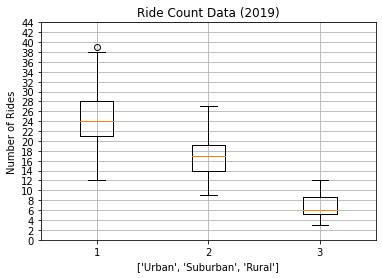

In [30]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots()
#ax.boxplot(urban_ride_count, labels=x_labels)
ax.boxplot(ride_count_data)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_xlabel (x_labels)
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 45, step=2.0))
ax.grid()
plt.show()

In [31]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
pyber_data_df 

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [41]:
sum_fares_by_type = pyber_data_df.groupby(pyber_data_df['type'])['fare']
sum_fares_by_type.sum()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [42]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [43]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

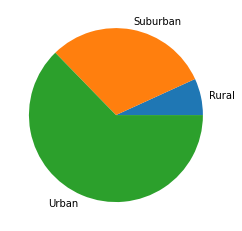

In [44]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

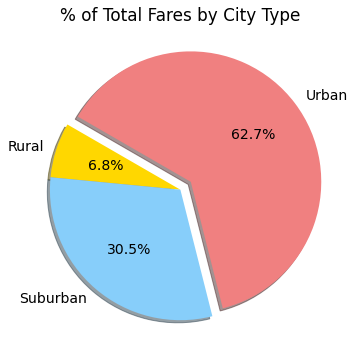

In [46]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()